In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [4]:
data = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [5]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [6]:
data.info

<bound method DataFrame.info of                price
Date                
2004-01-01  1.258194
2004-01-02  1.258194
2004-01-05  1.268698
2004-01-06  1.272103
2004-01-07  1.264095
...              ...
2020-06-24  1.131235
2020-06-25  1.125087
2020-06-26  1.122208
2020-06-29  1.122586
2020-06-30  1.124720

[4275 rows x 1 columns]>

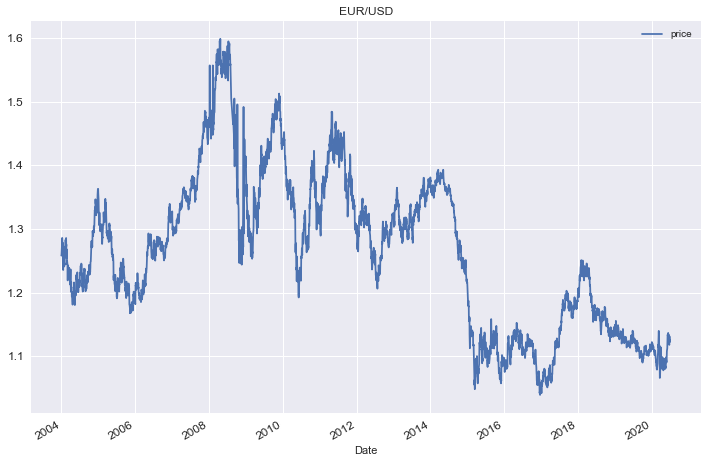

In [7]:
data.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

In [8]:
##Defining an RSI Strategy (Part 1)

In [9]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [10]:
data.price.diff()

Date
2004-01-01         NaN
2004-01-02    0.000000
2004-01-05    0.010504
2004-01-06    0.003405
2004-01-07   -0.008008
                ...   
2020-06-24    0.003267
2020-06-25   -0.006147
2020-06-26   -0.002879
2020-06-29    0.000378
2020-06-30    0.002134
Name: price, Length: 4275, dtype: float64

In [19]:
data["U"] = np.where(data.price.diff() > 0, data.price.diff(), 0)

U:

if positive price change ("up"): price change
if negative price change ("down"): 0

In [20]:
data["D"] = np.where(data.price.diff() < 0, -data.price.diff(), 0)

D:

if positive price change ("up"): 0
if negative price change ("down"): -price change

In [21]:
data

,price,D,Diff,U
Date,,,,
2004-01-01,1.258194,0.000000,0.000000,0.000000
2004-01-02,1.258194,0.000000,0.000000,0.000000
2004-01-05,1.268698,0.000000,0.000000,0.010504
2004-01-06,1.272103,0.000000,0.000000,0.003405
2004-01-07,1.264095,0.008008,0.008008,0.000000
...,...,...,...,...
2020-06-24,1.131235,0.000000,0.000000,0.003267
2020-06-25,1.125087,0.006147,0.006147,0.000000
2020-06-26,1.122208,0.002879,0.002879,0.000000


In [15]:
##Calculate Moving Averages for U and D (alternative: exponential smoothing)

In [16]:
periods = 20

In [22]:
data["U"] = np.where(data.price.diff() > 0, data.price.diff(), 0)

In [23]:
data["MA_U"] = data.U.rolling(periods).mean()

In [24]:
data["MA_D"] = data.D.rolling(periods).mean()

In [25]:
data

,price,D,Diff,U,MA_U,MA_D
Date,,,,,,
2004-01-01,1.258194,0.000000,0.000000,0.000000,NaN,NaN
2004-01-02,1.258194,0.000000,0.000000,0.000000,NaN,NaN
2004-01-05,1.268698,0.000000,0.000000,0.010504,NaN,NaN
2004-01-06,1.272103,0.000000,0.000000,0.003405,NaN,NaN
2004-01-07,1.264095,0.008008,0.008008,0.000000,NaN,NaN
...,...,...,...,...,...,...
2020-06-24,1.131235,0.000000,0.000000,0.003267,0.003182,0.001530
2020-06-25,1.125087,0.006147,0.006147,0.000000,0.003007,0.001837
2020-06-26,1.122208,0.002879,0.002879,0.000000,0.002696,0.001981


In [26]:
##Calculate Relative Strength Index (RSI)

In [28]:
data["RSI"] = data.MA_U / (data.MA_U + data.MA_D) * 100

In [29]:
data.dropna(inplace = True)

In [30]:
data

,price,D,Diff,U,MA_U,MA_D,RSI
Date,,,,,,,
2004-01-28,1.244199,0.019496,0.019496,0.000000,0.004610,0.005310,46.472973
2004-01-29,1.241003,0.003196,0.003196,0.000000,0.004610,0.005470,45.736150
2004-01-30,1.246805,0.000000,0.000000,0.005802,0.004900,0.005470,47.254310
2004-02-02,1.243302,0.003503,0.003503,0.000000,0.004375,0.005645,43.663573
2004-02-03,1.253494,0.000000,0.000000,0.010192,0.004714,0.005645,45.509086
...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.000000,0.000000,0.003267,0.003182,0.001530,67.538713
2020-06-25,1.125087,0.006147,0.006147,0.000000,0.003007,0.001837,62.077668
2020-06-26,1.122208,0.002879,0.002879,0.000000,0.002696,0.001981,57.643190


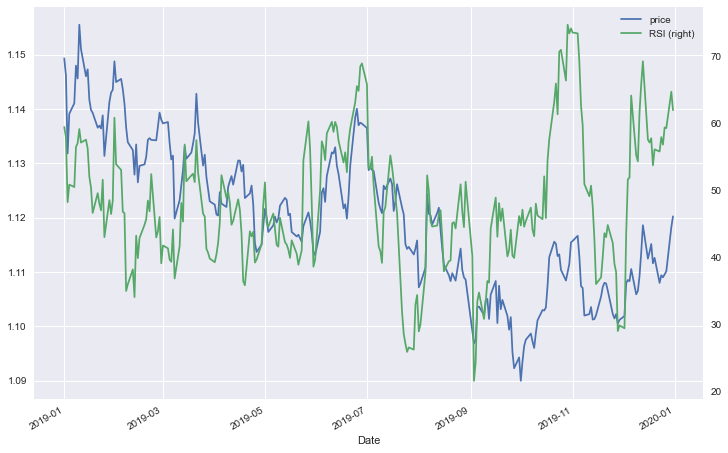

In [33]:
data.loc["2019", ["price", "RSI"]].plot(figsize = (12,8), secondary_y = "RSI")
plt.show()

Instruments which have had

more or stronger positive changes have a higher RSI
more or stronger negative changes have a lower RSI

In [34]:
## Defining an RSI Strategy (Part 2)

. "Extreme high RSI (>70) indicates overbought instrument -> sell"
. "Extreme low RSI (<30) indicates oversold instrument -> buy"

In [35]:
rsi_upper = 70
rsi_lower = 30

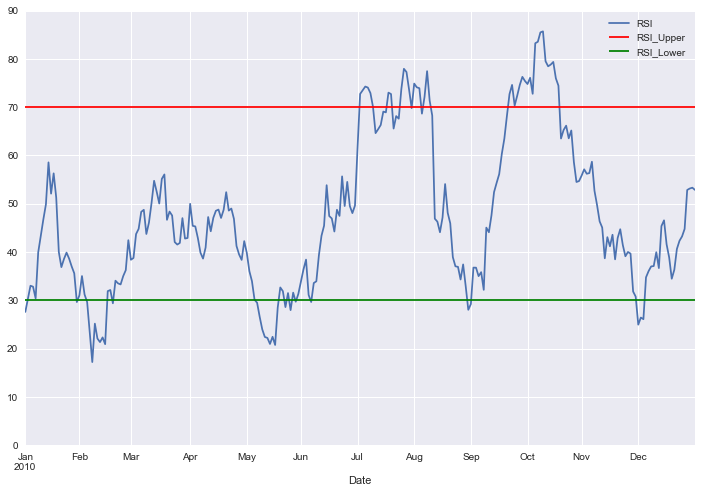

In [36]:
data.loc["2010", ["RSI"]].plot(figsize = (12,8))
plt.hlines(y = rsi_upper, xmin = data.index[0], xmax = data.index[-1], label = "RSI_Upper", color = "r")
plt.hlines(y = rsi_lower, xmin = data.index[0], xmax = data.index[-1], label = "RSI_Lower", color = "g")
plt.yticks(ticks = range(0, 100, 10))
plt.legend()
plt.show()

In [39]:
data["position"] = np.where(data.RSI > rsi_upper, -1, np.nan) # 1. overbought -> go short

In [40]:
data["position"] = np.where(data.RSI < rsi_lower, 1, data.position) #2. oversold --> go long

In [41]:
data["position"] = data.position.fillna(0) #3. where 1& 2 isn't applicable --> neutral

In [42]:
data

,price,D,Diff,U,MA_U,MA_D,RSI,position
Date,,,,,,,,
2004-01-28,1.244199,0.019496,0.019496,0.000000,0.004610,0.005310,46.472973,0.0
2004-01-29,1.241003,0.003196,0.003196,0.000000,0.004610,0.005470,45.736150,0.0
2004-01-30,1.246805,0.000000,0.000000,0.005802,0.004900,0.005470,47.254310,0.0
2004-02-02,1.243302,0.003503,0.003503,0.000000,0.004375,0.005645,43.663573,0.0
2004-02-03,1.253494,0.000000,0.000000,0.010192,0.004714,0.005645,45.509086,0.0
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.000000,0.000000,0.003267,0.003182,0.001530,67.538713,0.0
2020-06-25,1.125087,0.006147,0.006147,0.000000,0.003007,0.001837,62.077668,0.0
2020-06-26,1.122208,0.002879,0.002879,0.000000,0.002696,0.001981,57.643190,0.0


In [43]:
data.position.value_counts()

 0.0    3637
-1.0     316
 1.0     303
Name: position, dtype: int64

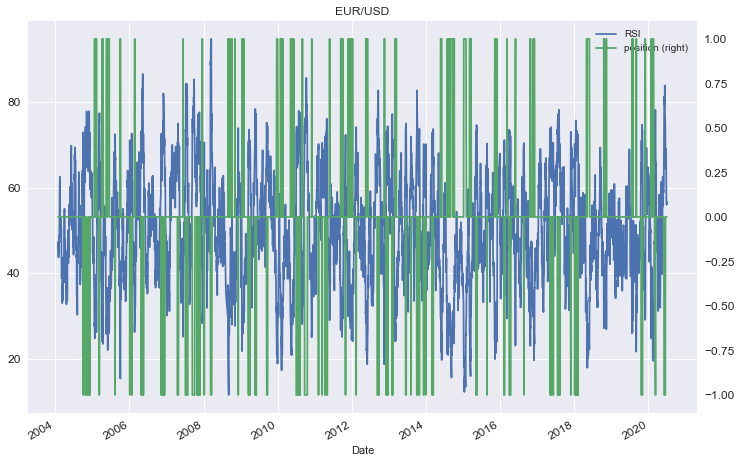

In [45]:
data.loc[:, ["RSI", "position"]].plot(figsize = (12, 8), fontsize = 12, 
                                                      secondary_y = "position", title = "EUR/USD")
plt.show()

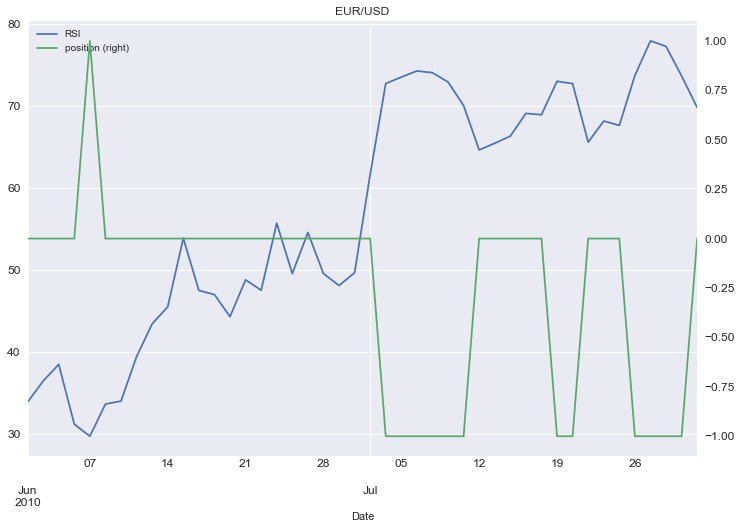

In [49]:
data.loc["06-2010":"07-2010", ["RSI", "position"]].plot(figsize = (12, 8), fontsize = 12,
                                                        secondary_y = "position", title = "EUR/USD")
plt.show()

In [50]:
##Vectorized Strategy Backtesting

In [51]:
data

,price,D,Diff,U,MA_U,MA_D,RSI,position
Date,,,,,,,,
2004-01-28,1.244199,0.019496,0.019496,0.000000,0.004610,0.005310,46.472973,0.0
2004-01-29,1.241003,0.003196,0.003196,0.000000,0.004610,0.005470,45.736150,0.0
2004-01-30,1.246805,0.000000,0.000000,0.005802,0.004900,0.005470,47.254310,0.0
2004-02-02,1.243302,0.003503,0.003503,0.000000,0.004375,0.005645,43.663573,0.0
2004-02-03,1.253494,0.000000,0.000000,0.010192,0.004714,0.005645,45.509086,0.0
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.000000,0.000000,0.003267,0.003182,0.001530,67.538713,0.0
2020-06-25,1.125087,0.006147,0.006147,0.000000,0.003007,0.001837,62.077668,0.0
2020-06-26,1.122208,0.002879,0.002879,0.000000,0.002696,0.001981,57.643190,0.0


In [53]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [54]:
data.dropna(inplace = True)

In [55]:
data

,price,D,Diff,U,MA_U,MA_D,RSI,position,returns
Date,,,,,,,,,
2004-01-29,1.241003,0.003196,0.003196,0.000000,0.004610,0.005470,45.736150,0.0,-0.002572
2004-01-30,1.246805,0.000000,0.000000,0.005802,0.004900,0.005470,47.254310,0.0,0.004665
2004-02-02,1.243302,0.003503,0.003503,0.000000,0.004375,0.005645,43.663573,0.0,-0.002814
2004-02-03,1.253494,0.000000,0.000000,0.010192,0.004714,0.005645,45.509086,0.0,0.008164
2004-02-04,1.253997,0.000000,0.000000,0.000503,0.004740,0.005244,47.471521,0.0,0.000401
...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.000000,0.000000,0.003267,0.003182,0.001530,67.538713,0.0,0.002892
2020-06-25,1.125087,0.006147,0.006147,0.000000,0.003007,0.001837,62.077668,0.0,-0.005449
2020-06-26,1.122208,0.002879,0.002879,0.000000,0.002696,0.001981,57.643190,0.0,-0.002562


In [56]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [57]:
data

,price,D,Diff,U,MA_U,MA_D,RSI,position,returns,strategy
Date,,,,,,,,,,
2004-01-29,1.241003,0.003196,0.003196,0.000000,0.004610,0.005470,45.736150,0.0,-0.002572,NaN
2004-01-30,1.246805,0.000000,0.000000,0.005802,0.004900,0.005470,47.254310,0.0,0.004665,0.0
2004-02-02,1.243302,0.003503,0.003503,0.000000,0.004375,0.005645,43.663573,0.0,-0.002814,-0.0
2004-02-03,1.253494,0.000000,0.000000,0.010192,0.004714,0.005645,45.509086,0.0,0.008164,0.0
2004-02-04,1.253997,0.000000,0.000000,0.000503,0.004740,0.005244,47.471521,0.0,0.000401,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.000000,0.000000,0.003267,0.003182,0.001530,67.538713,0.0,0.002892,0.0
2020-06-25,1.125087,0.006147,0.006147,0.000000,0.003007,0.001837,62.077668,0.0,-0.005449,-0.0
2020-06-26,1.122208,0.002879,0.002879,0.000000,0.002696,0.001981,57.643190,0.0,-0.002562,-0.0


In [58]:
data.dropna(inplace = True)

In [59]:
ptc = 0.00007

In [60]:
data["trades"] = data.position.diff().fillna(0).abs()

In [61]:
data.trades.value_counts()

0.0    3926
1.0     328
Name: trades, dtype: int64

In [62]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [63]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data["cstrategy_net"] = data["strategy_net"].cumsum().apply(np.exp)

In [64]:
data

,price,D,Diff,U,MA_U,MA_D,RSI,position,returns,strategy,trades,strategy_net,creturns,cstrategy,cstrategy_net
Date,,,,,,,,,,,,,,,
2004-01-30,1.246805,0.000000,0.000000,0.005802,0.004900,0.005470,47.254310,0.0,0.004665,0.0,0.0,0.0,1.004676,1.000000,1.000000
2004-02-02,1.243302,0.003503,0.003503,0.000000,0.004375,0.005645,43.663573,0.0,-0.002814,-0.0,0.0,-0.0,1.001852,1.000000,1.000000
2004-02-03,1.253494,0.000000,0.000000,0.010192,0.004714,0.005645,45.509086,0.0,0.008164,0.0,0.0,0.0,1.010066,1.000000,1.000000
2004-02-04,1.253997,0.000000,0.000000,0.000503,0.004740,0.005244,47.471521,0.0,0.000401,0.0,0.0,0.0,1.010471,1.000000,1.000000
2004-02-05,1.257197,0.000000,0.000000,0.003200,0.004229,0.005244,44.642922,0.0,0.002549,0.0,0.0,0.0,1.013050,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.000000,0.000000,0.003267,0.003182,0.001530,67.538713,0.0,0.002892,0.0,0.0,0.0,0.911549,1.562978,1.527501
2020-06-25,1.125087,0.006147,0.006147,0.000000,0.003007,0.001837,62.077668,0.0,-0.005449,-0.0,0.0,-0.0,0.906595,1.562978,1.527501
2020-06-26,1.122208,0.002879,0.002879,0.000000,0.002696,0.001981,57.643190,0.0,-0.002562,-0.0,0.0,-0.0,0.904276,1.562978,1.527501


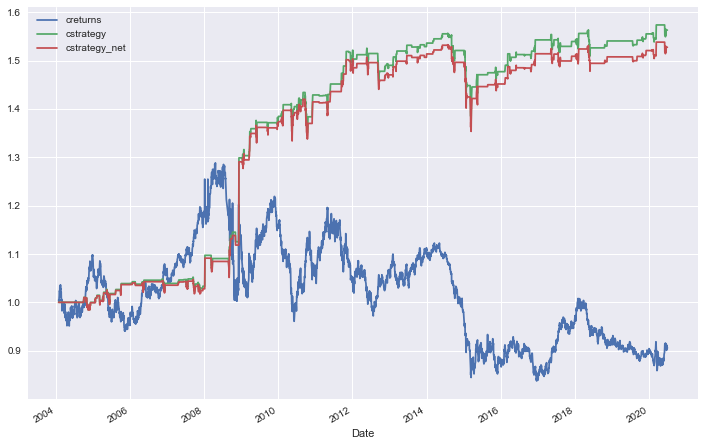

In [65]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12,8))
plt.show()

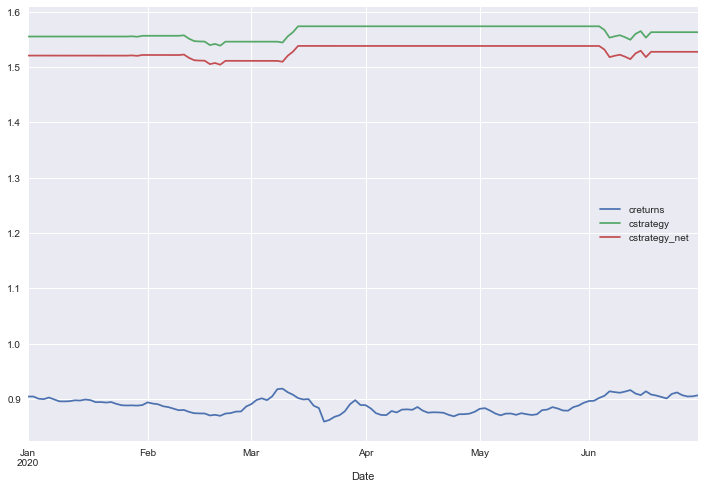

In [66]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

In [67]:
##Using the RSIBacktester Class

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")

In [69]:
pd.read_csv("forex_pairs.csv")

,Date,AUDEUR=X,EURUSD=X,USDGBP=X
0,2004-01-01,0.59780,1.258194,0.56016
1,2004-01-02,0.60314,1.258194,0.55751
2,2004-01-05,0.60467,1.268698,0.55334
3,2004-01-06,0.60350,1.272103,0.54906
4,2004-01-07,0.60728,1.264095,0.55012
...,...,...,...,...
4290,2020-06-24,0.61349,1.131235,0.79841
4291,2020-06-25,0.60938,1.125087,0.80561
4292,2020-06-26,0.61373,1.122208,0.80480
4293,2020-06-29,0.61128,1.122586,0.81023


In [71]:
from RSIBacktester import RSIBacktester as RSI

In [73]:
ptc = 0.00007

In [76]:
tester = RSI("EURUSD=X", periods = 20, rsi_upper = 70, rsi_lower = 30,
              start = "2004-01-01", end = "2020-06-30", tc = ptc)

In [77]:
tester

RSIBacktester(symbol = EURUSD=X, RSI(20, 70, 30), start = 2004-01-01, end = 2020-06-30)

In [78]:
tester.data

,price,returns,U,D,MA_U,MA_D,RSI
Date,,,,,,,
2004-01-01,1.258194,NaN,0.000000,0.000000,NaN,NaN,NaN
2004-01-02,1.258194,0.000000,0.000000,0.000000,NaN,NaN,NaN
2004-01-05,1.268698,0.008313,0.010504,0.000000,NaN,NaN,NaN
2004-01-06,1.272103,0.002681,0.003405,0.000000,NaN,NaN,NaN
2004-01-07,1.264095,-0.006315,0.000000,0.008008,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,0.003267,0.000000,0.003182,0.001530,67.538713
2020-06-25,1.125087,-0.005449,0.000000,0.006147,0.003007,0.001837,62.077668
2020-06-26,1.122208,-0.002562,0.000000,0.002879,0.002696,0.001981,57.643190


In [79]:
tester.test_strategy()

(1.527501, 0.62353)

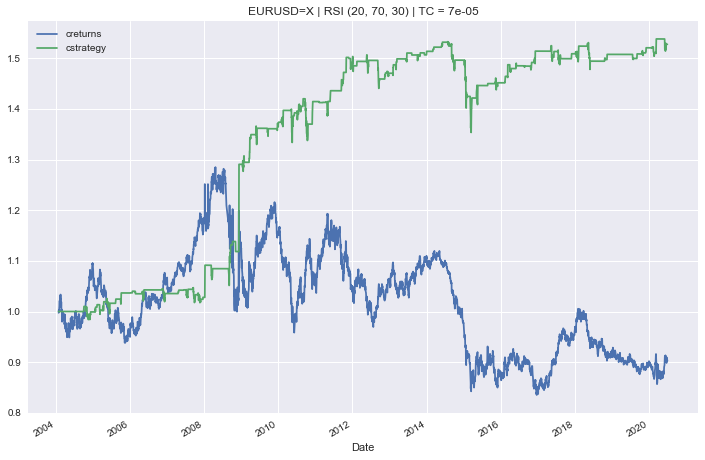

In [80]:
tester.plot_results()

In [81]:
tester.results

,price,returns,U,D,MA_U,MA_D,RSI,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,,,
2004-01-29,1.241003,-0.002572,0.000000,0.003196,0.004610,0.005470,45.736150,0.0,-0.0,0.0,0.997431,1.000000
2004-01-30,1.246805,0.004665,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.0,0.0,1.002095,1.000000
2004-02-02,1.243302,-0.002814,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.0,0.0,0.999279,1.000000
2004-02-03,1.253494,0.008164,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.0,0.0,1.007471,1.000000
2004-02-04,1.253997,0.000401,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.0,0.0,1.007875,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.0,0.0,0.909207,1.527501
2020-06-25,1.125087,-0.005449,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.0,0.0,0.904266,1.527501
2020-06-26,1.122208,-0.002562,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.0,0.0,0.901953,1.527501


In [82]:
tester.optimize_parameters((5, 20, 1), (65, 80, 1), (20, 35, 1)) # higher vollatility

(array([ 6., 65., 20.]), 2.582989)

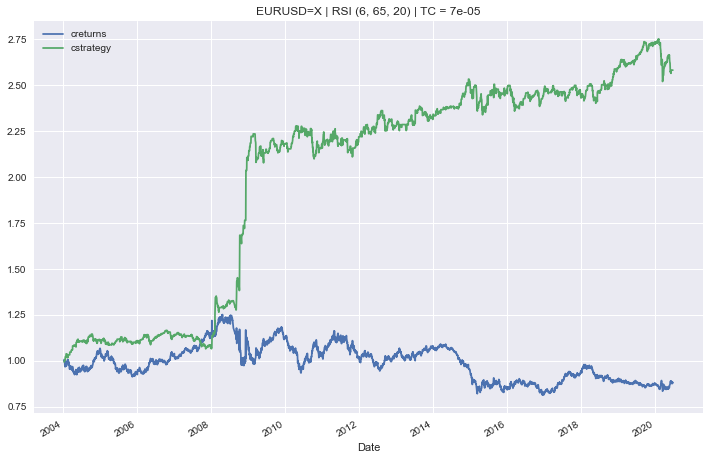

In [83]:
tester.plot_results()

In [84]:
tester.optimize_parameters((20, 50, 1), (75, 85, 1), (15, 25, 1)) # lower volatility

(array([26., 75., 24.]), 1.237744)

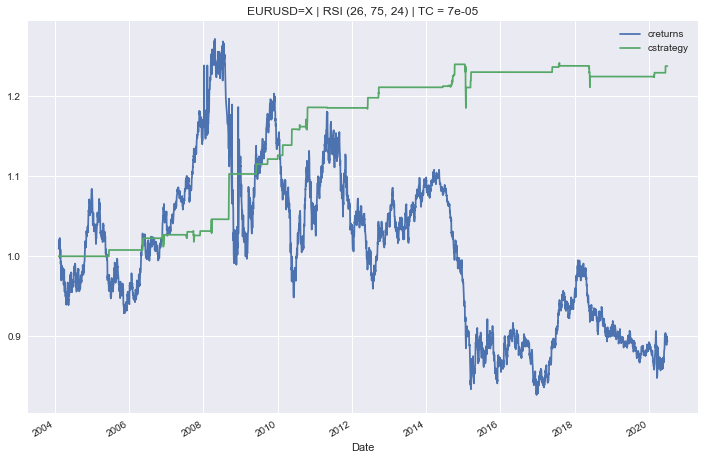

In [85]:
tester.plot_results()

In [86]:
##USD / GBP

In [87]:
tester = RSI("USDGBP=X", periods = 20, rsi_upper = 70, rsi_lower = 30,
              start = "2004-01-01", end = "2020-06-30", tc = 0)

In [88]:
tester.test_strategy()

(1.060393, -0.414041)

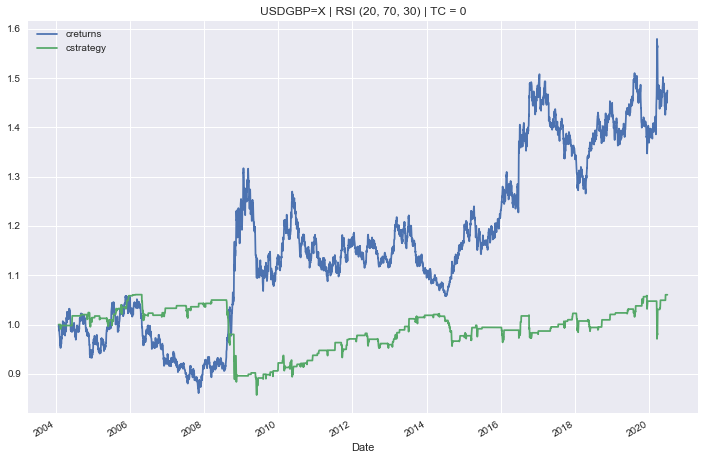

In [90]:
tester.plot_results()

In [91]:
tester.optimize_parameters((5, 20, 1), (65, 80, 1), (20, 35, 1)) # high volatility

(array([ 7., 66., 34.]), 1.515508)

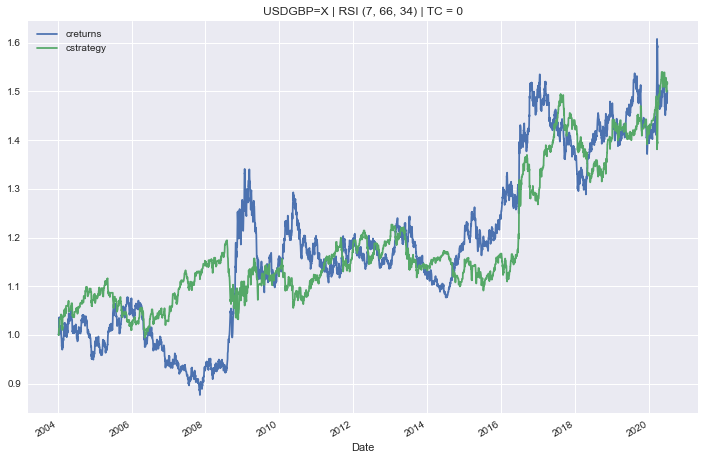

In [92]:
tester.plot_results()

In [93]:
## Alternative Strategies and Interpretations

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")
from RSIBacktester import RSIBacktester as RSI

In [95]:
tester = RSI("EURUSD=X", periods = 20, rsi_upper = 70, rsi_lower = 30,
              start = "2004-01-01", end = "2020-06-30", tc = 0)

In [96]:
alt = tester.data.dropna()
alt

,price,returns,U,D,MA_U,MA_D,RSI
Date,,,,,,,
2004-01-28,1.244199,-0.015548,0.000000,0.019496,0.004610,0.005310,46.472973
2004-01-29,1.241003,-0.002572,0.000000,0.003196,0.004610,0.005470,45.736150
2004-01-30,1.246805,0.004665,0.005802,0.000000,0.004900,0.005470,47.254310
2004-02-02,1.243302,-0.002814,0.000000,0.003503,0.004375,0.005645,43.663573
2004-02-03,1.253494,0.008164,0.010192,0.000000,0.004714,0.005645,45.509086
...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,0.003267,0.000000,0.003182,0.001530,67.538713
2020-06-25,1.125087,-0.005449,0.000000,0.006147,0.003007,0.001837,62.077668
2020-06-26,1.122208,-0.002562,0.000000,0.002879,0.002696,0.001981,57.643190


Convergence:

if Price reaches higher highs -> RSI reaches higher highs (confirmation)
if Price reaches lower lows -> RSI reaches lower lows (confirmation)

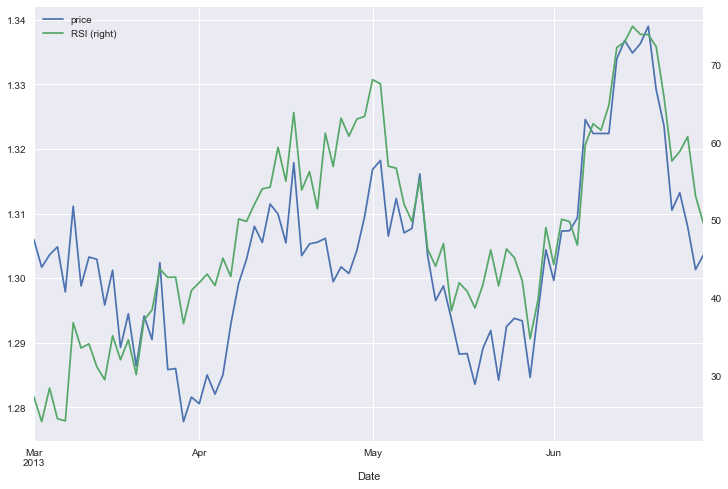

In [97]:
alt.loc["03-2013":"06-2013", ["price", "RSI"]].plot(figsize = (12, 8), secondary_y = "RSI")
plt.show()

Divergence:

if Price reaches higher highs -> RSI fails to reach higher highs (Bearish Divergence)
if Price reaches lower lows -> RSI fails to reach lower lows (Bullish Divergence)

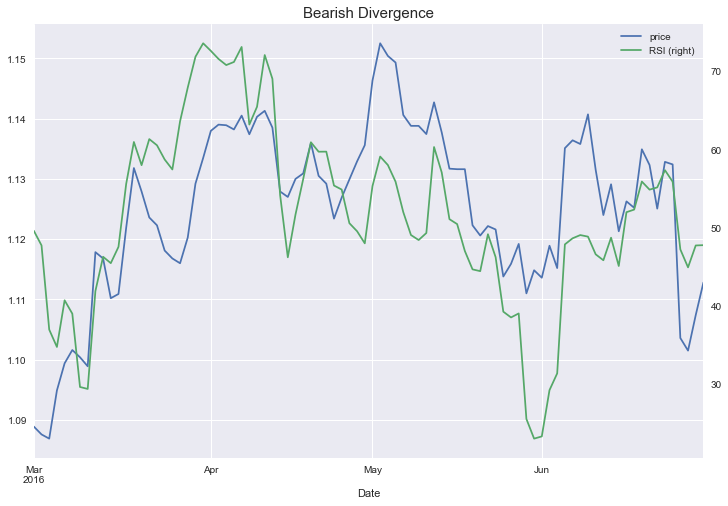

In [98]:
alt.loc["03-2016":"06-2016", ["price", "RSI"]].plot(figsize = (12, 8), secondary_y = "RSI")
plt.title("Bearish Divergence", fontsize = 15)
plt.show()

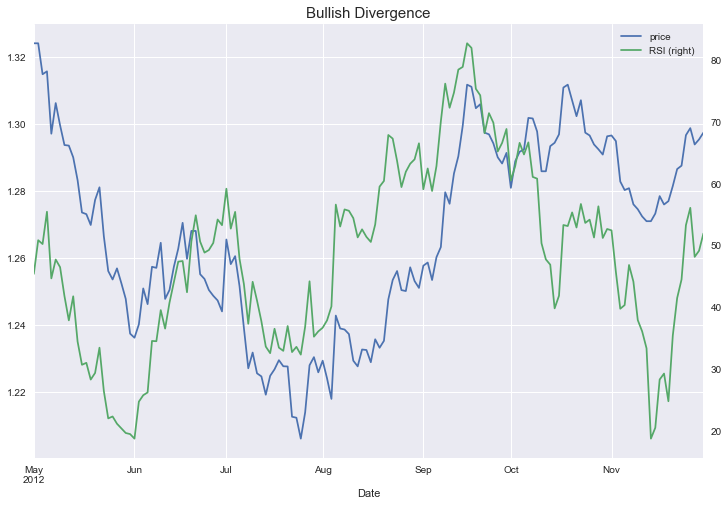

In [99]:
alt.loc["05-2012":"11-2012", ["price", "RSI"]].plot(figsize = (12, 8), secondary_y = "RSI")
plt.title("Bullish Divergence", fontsize = 15)
plt.show()